In [1]:
import pickle
import matplotlib.pyplot as plot
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
import numpy as np
import pandas as pd
from sklearn import preprocessing
from pandas import DataFrame
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import pickle
from gplearn.genetic import SymbolicClassifier
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
from io import StringIO
from IPython.display import Image

In [2]:
dataset= r'叠加NLP的特征选择后分类 .csv'
data=pd.DataFrame(pd.read_csv(dataset))

In [3]:
X = data.values[:, :-1]
y = data.values[:, -1]
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=1)


for i in range(X_train.shape[1]):
    X_train[:, [i]] = preprocessing.MinMaxScaler().fit_transform(X_train[:, [i]])



for i in range(X_test.shape[1]):
    X_test[:, [i]] = preprocessing.MinMaxScaler().fit_transform(X_test[:, [i]])

In [4]:
feature_names = list(data.columns[:-1])

In [5]:
# # 定义符号回归模型，并使用训练数据拟合模型
# reg = SymbolicRegressor(population_size=5000, generations=100, verbose=1,
#                          function_set=['add', 'sub', 'mul', 'div', 'sqrt', 'log', 'abs', 'neg', 
#                                        'inv', 'max', 'min', 'sin', 'cos', 'tan'],
#                          metric='mean absolute error', stopping_criteria=0.001,
#                          random_state=0)
# reg.fit(X_train, y_train)

# 创建符号分类器
reg = SymbolicClassifier(population_size=5000, generations=30, tournament_size=20,
                         stopping_criteria=0.0, const_range=(-1.0, 1.0), verbose=1)
reg.fit(X_train, y_train)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    26.10          2.17518        7         0.543151              N/A      1.65m
   1     5.77         0.739077        7         0.543151              N/A      1.32m
   2     6.25         0.741616        7         0.517469              N/A      1.25m
   3     7.20         0.920273       13         0.508044              N/A      1.23m
   4     8.14          1.16452       17         0.475059              N/A      1.24m
   5     9.01          1.13725       15         0.469319              N/A      1.17m
   6    10.22          1.07227       23         0.434132              N/A      1.13m
   7    13.88         0.867629       39         0.425217              N/A      1.13m
   8    18.44         0.809871       35          0.41164              N/A  

SymbolicClassifier(generations=30, population_size=5000, verbose=1)

In [6]:
print(set(str(reg._program).split()))

{'sub(X0,', 'add(add(sub(X12,', 'X7),', 'mul(add(add(sub(X12,', 'sub(X12,', 'add(mul(add(add(sub(X12,', 'div(X3,', 'mul(X15,', 'X7)),', 'add(sub(add(add(sub(mul(X0,', 'sub(div(sub(X13,', 'div(X13,', 'X2),', 'sub(X5,', 'add(sub(X12,', 'X5),', 'X16)),', 'add(mul(add(add(mul(X0,', 'X16))))))),', 'X2))))),', 'X16))),', 'X12))),', 'X15)),', 'X2)),', 'X6),', 'div(sub(X13,', 'sub(X2,', 'X12)),', 'sub(add(div(sub(X13,', 'X13)),', 'X16)))),', 'X15),', 'X4)))', 'add(X3,', 'sub(X20,', 'div(sub(sub(X12,', 'add(mul(add(div(mul(add(sub(X20,', 'X6)))),', 'X12)))))),', 'div(X2,'}


Confusion Matrix:
[[29  1]
 [ 2  9]]


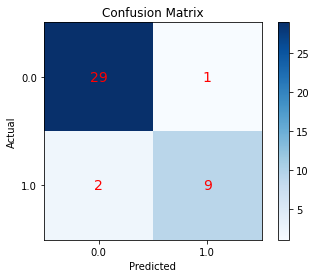

In [7]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Prediction on test set
y_pred = reg.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(np.arange(len(set(y))), set(y))
plt.yticks(np.arange(len(set(y))), set(y))

# Adding text to the confusion matrix cells with larger font size
for i in range(len(set(y))):
    for j in range(len(set(y))):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='red', fontsize=14)
plt.savefig('有NLP的test.png')
plt.show()

Confusion Matrix:
[[49  2]
 [ 3 41]]


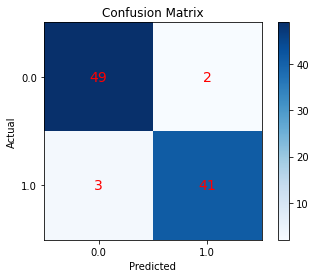

In [8]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Prediction on test set
y_pred = reg.predict(X_train)

# Confusion matrix
cm = confusion_matrix(y_train, y_pred)
print("Confusion Matrix:")
print(cm)

plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(np.arange(len(set(y))), set(y))
plt.yticks(np.arange(len(set(y))), set(y))

# Adding text to the confusion matrix cells with larger font size
for i in range(len(set(y))):
    for j in range(len(set(y))):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='red', fontsize=14)
plt.savefig('有NLP的train.png')
plt.show()

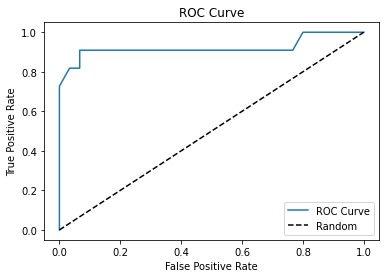

Accuracy: 0.926829268292683


In [9]:
# ROC Curve
y_probs = reg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Plotting ROC Curve
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.savefig('有NLP的test的ROC.png')
plt.show()

# Accuracy
accuracy = reg.score(X_test, y_test)
print("Accuracy:", accuracy)


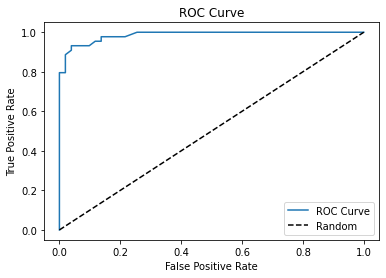

Accuracy: 0.9473684210526315


In [10]:
# ROC Curve
y_probs = reg.predict_proba(X_train)[:, 1]
fpr, tpr, thresholds = roc_curve(y_train, y_probs)

# Plotting ROC Curve
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.savefig('有NLP的train的ROC.png')
plt.show()

# Accuracy
accuracy = reg.score(X_train, y_train)
print("Accuracy:", accuracy)


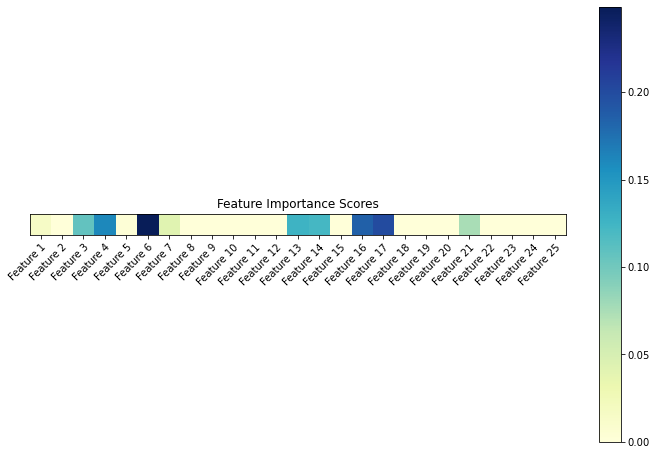

In [11]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np

# Get feature-importance scores
result = permutation_importance(reg, X_test, y_test, n_repeats=10, random_state=0)

# Create a heatmap
fig, ax = plt.subplots(figsize=(12,8))
im = ax.imshow(result.importances_mean.reshape(1, -1), cmap='YlGnBu')

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set tick labels
ax.set_xticks(np.arange(len(result.importances_mean)))
ax.set_xticklabels([f"Feature {i+1}" for i in range(len(result.importances_mean))])
ax.set_yticks([])

# Rotate tick labels
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Set plot title and show plot
ax.set_title("Feature Importance Scores")
plt.savefig('有NLP的特征重要图.png')
plt.show()
# 这个代码会创建一个热力图，显示特征重要性分数。
# x轴显示特征编号，每个单元格的颜色表示该特征的重要性分数，颜色越亮，意味着该特征对该模型越重要。

In [12]:
import pickle

# 保存训练好的模型
with open('有NLP_symbol_classifier.pkl', 'wb') as file:
    pickle.dump(reg, file)

#

In [13]:
# # 加载保存的模型
# with open('有NLP_symbol_classifier.pkl', 'rb') as file:
#     reg = pickle.load(file)

In [14]:
# 根据模型预测结果绘制决策边界图

# 将输入数据转换为二维特征向量
X = np.column_stack([X_train, np.zeros((X_train.shape[0], 24 - X_train.shape[1]))])

h = .002  # 步长
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = reg.predict(np.c_[xx.ravel(), yy.ravel(), 
                      np.zeros((xx.ravel().shape[0], 24 - 2))])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision Boundary')
plt.show()
# 如果你的模型是用于分类任务，通过绘制决策边界图，你可以观察模型对不同类别的划分效果和边界位置。
# 这有助于你了解模型在特征空间中的决策规则和分类分界线的形状，以及对不同类别样本的分类效果。

ValueError: negative dimensions are not allowed

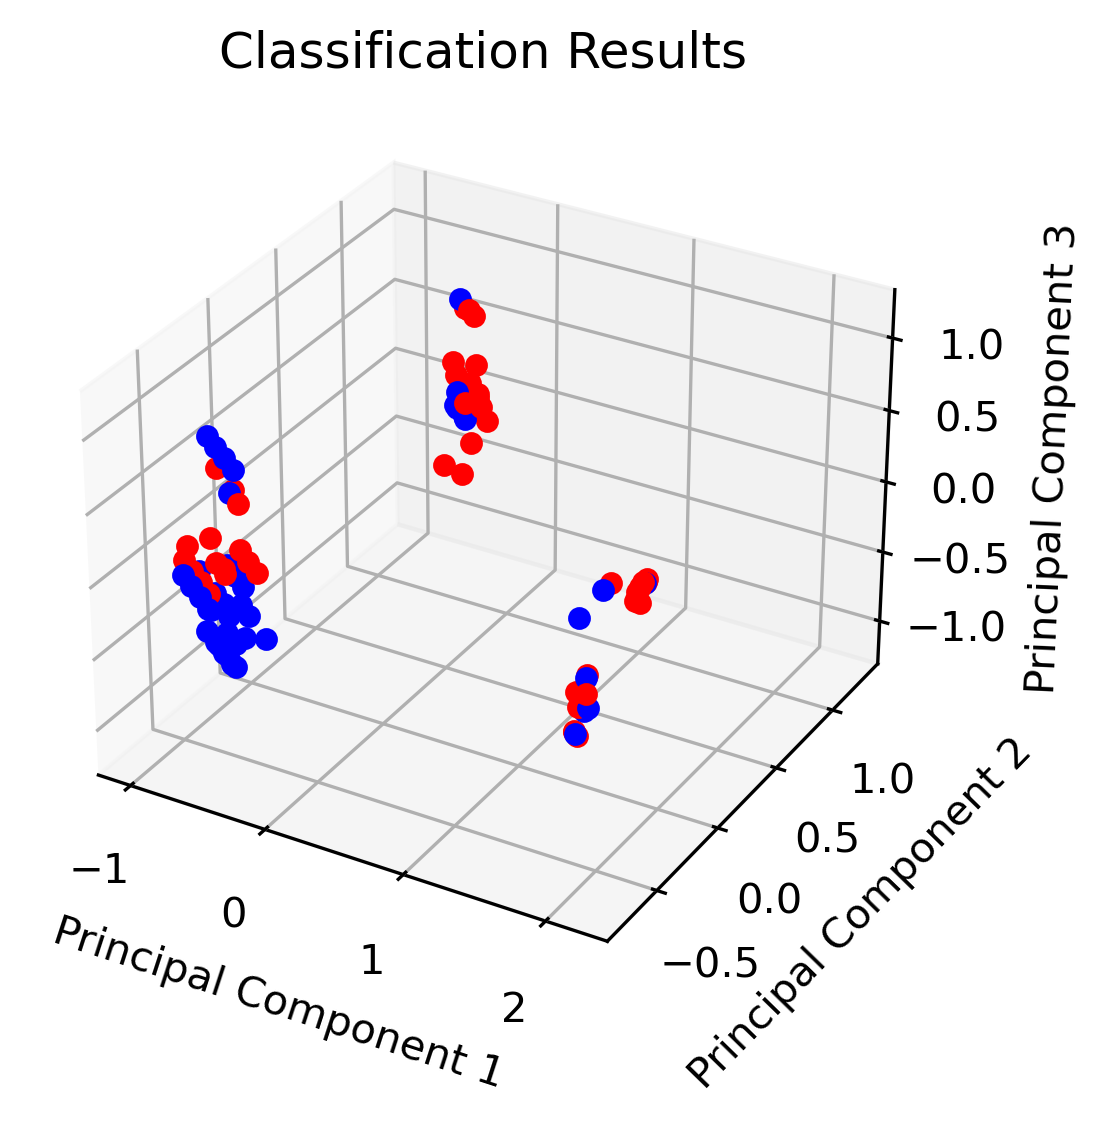

In [15]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 使用PCA将数据降维到3维
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_train)

# 绘制三维图
fig = plt.figure(dpi=300)
ax = fig.add_subplot(111, projection='3d')

# 绘制每个样本点
for i in range(X_train.shape[0]):
    if y_train[i] == 0:
        ax.scatter(X_pca[i, 0], X_pca[i, 1], X_pca[i, 2], c='r', label='Class 0')
    else:
        ax.scatter(X_pca[i, 0], X_pca[i, 1], X_pca[i, 2], c='b', label='Class 1')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('Classification Results')
plt.savefig('有NLP的三维图.png')
plt.show()
# 其中散点表示训练数据在降维后的三个主成分上的投影。
# 不同类别的点用不同的颜色表示。通过这个图，您可以更好地理解数据的分布情况和符号分类器对分类任务的表现。
# PCA是一种常用的降维技术，在降维过程中，它会将原始数据通过线性变换转换为一组新的特征，称为主成分。
# 这些主成分按照其重要程度进行排序，第一个主成分即"Principal Component 1"对应的是解释原始数据方差最多的方向，第二个主成分即"Principal Component 2"对应的是解释剩余方差最多的方向，依此类推。因此，这些主成分代表了原始数据中的重要信息。
# 在三维空间中，我们可以使用这些降维后的主成分来表示样本点的位置。"Principal Component 1"表示样本在第一个主成分的投影，"Principal Component 2"表示样本在第二个主成分的投影，"Principal Component 3"表示样本在第三个主成分的投影。
# 通过在三维空间中绘制样本点的位置，您可以更好地观察到数据的分布情况以及分类结果。请记住，这些主成分是通过降维分析得到的，它们是原始数据的线性组合，可以用来解释数据的变异性。
# 数据的分布情况：您可以观察到数据点在三维空间中的分布情况。通过分析数据点的密度和聚集程度，您可以判断数据的结构和特征是否具有区分性。
# 类别的区分度：不同类别的数据点在三维空间中的分布情况可能不同。您可以观察到不同类别数据点的分离程度以及是否有重叠的情况。更好的分离和区分将意味着分类器的性能更好。
# 分类结果的可视化：您可以通过绘制分类结果的曲面或使用不同的颜色来表示不同的类别。这样可以直观地看到符号分类器对数据进行分类的效果。您可以观察到分类边界和分类错误的情况。

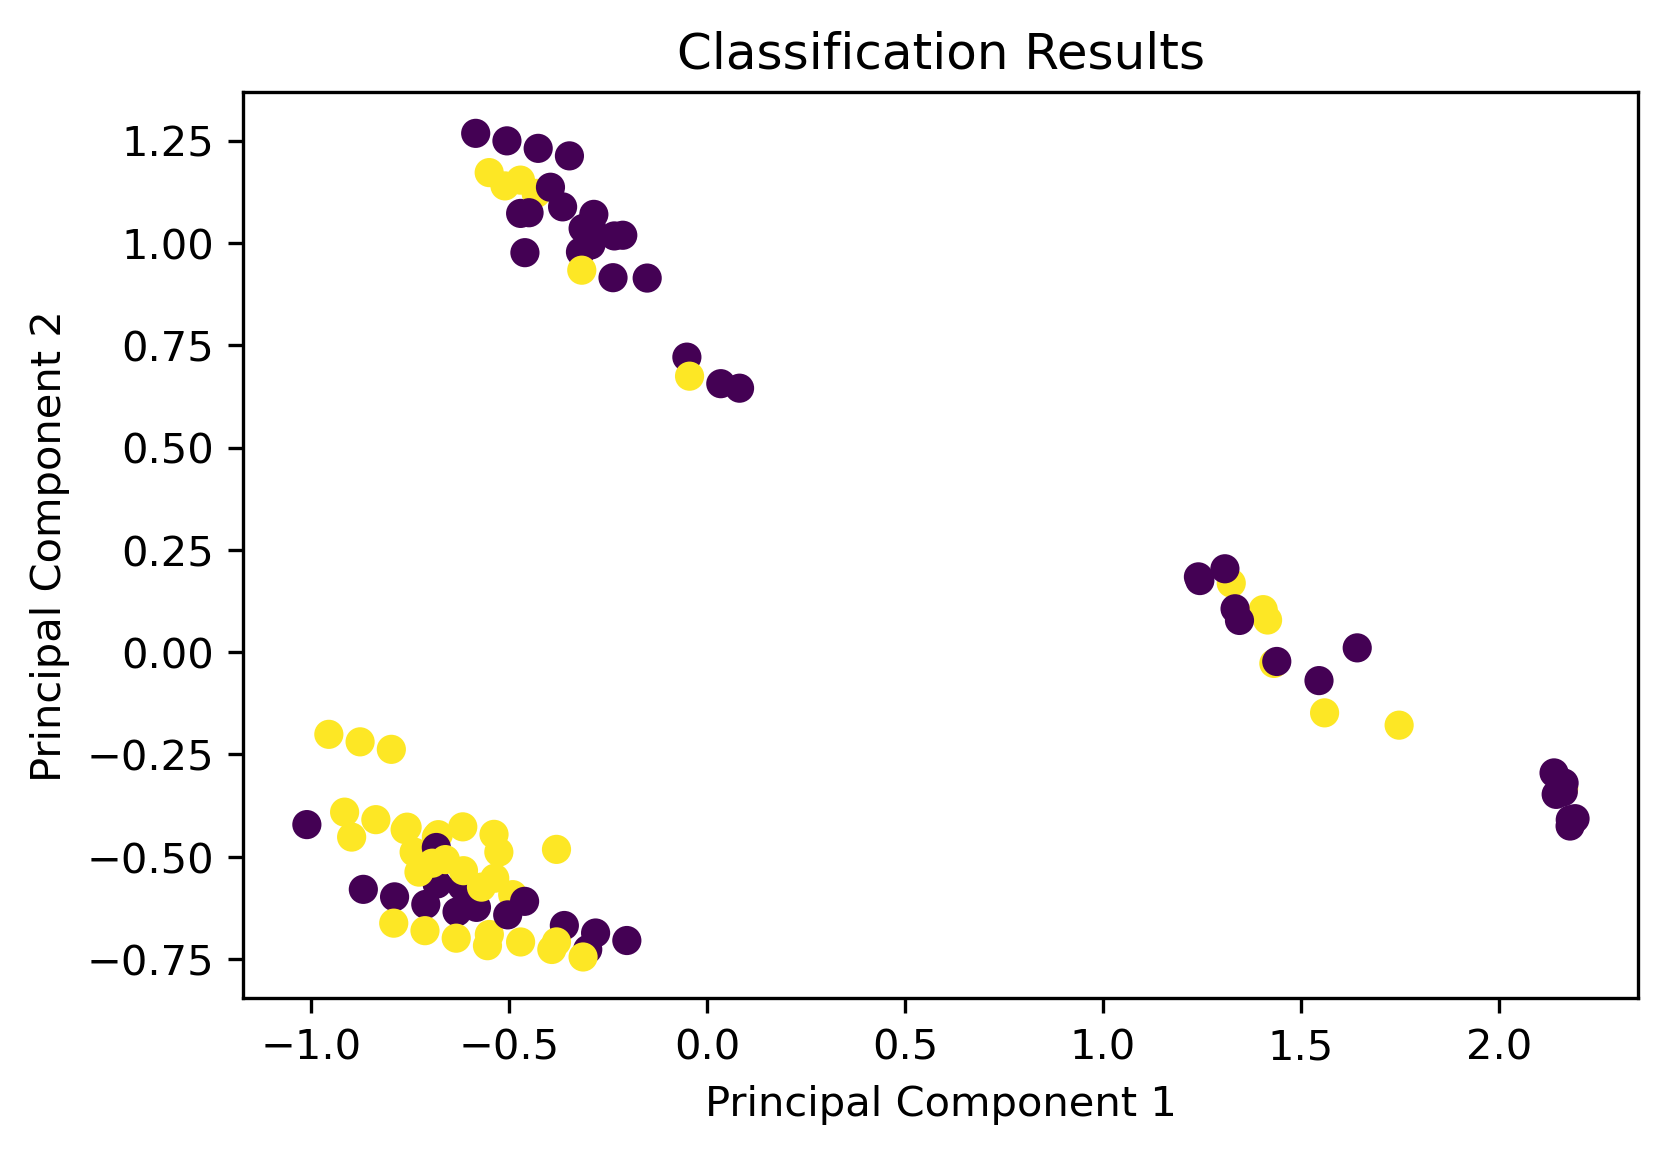

In [19]:
from sklearn.decomposition import PCA

# 使用PCA将数据降维到2维
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

# 绘制散点图
fig = plt.figure(dpi=300)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Classification Results')
plt.savefig('有NLP的二维图.png')
plt.show()

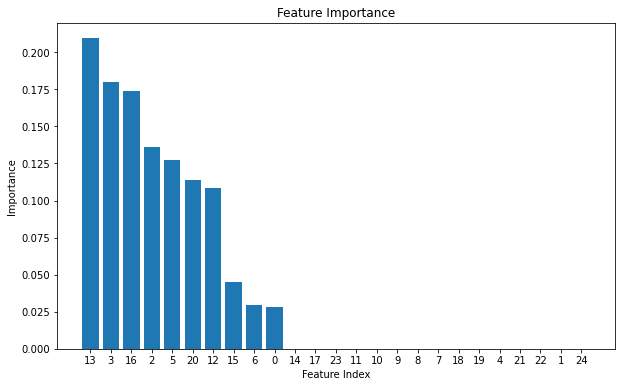

In [16]:


import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

# 计算特征重要性
result = permutation_importance(reg, X_train, y_train, n_repeats=10, random_state=0)
feature_importance = result.importances_mean

# 排序并获取各特征的索引和重要性值
indices = np.argsort(feature_importance)[::-1]
sorted_importance = np.sort(feature_importance)[::-1]

# 绘制特征重要性条形图
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), sorted_importance, align="center")
plt.xticks(range(len(feature_importance)), indices)
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.savefig('有NLP的条形图.png')
plt.show()
 


Feature 13: D_FpDensityMorgan1
Feature 3: ratio_D
Feature 16: D_MinAbsPartialCharge
Feature 2: ration_C
Feature 5: D_stable_similarity
Feature 20: E_BalabanJ
Feature 12: C_MinEStateIndex
Feature 15: D_MaxAbsPartialCharge
Feature 6: E_stable__similarity
Feature 0: ratio_A
Feature 14: D_Kappa3
Feature 17: D_MinPartialCharge
Feature 23: E_qed
Feature 11: C_MinAbsPartialCharge
Feature 10: E_mix_similarity
Feature 9: D_mix_similarity
Feature 8: C_mix_similarity
Feature 7: average_stable_similarity(C、D、E三个溶剂的平均值)
Feature 18: D_MolLogP
Feature 19: D_qed
Feature 4: C_stable_similarity
Feature 21: E_MinAbsEStateIndex
Feature 22: E_MinPartialCharge
Feature 1: ratio_B
Feature 24: Time


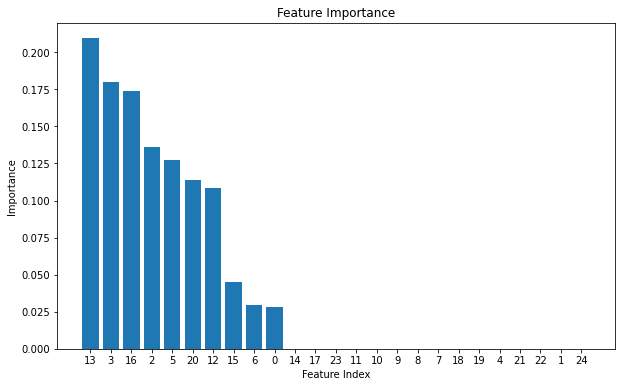

In [17]:
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

# 计算特征重要性
result = permutation_importance(reg, X_train, y_train, n_repeats=10, random_state=0)
feature_importance = result.importances_mean

# 排序并获取各特征的索引和重要性值
indices = np.argsort(feature_importance)[::-1]
sorted_importance = np.sort(feature_importance)[::-1]
 # Assuming X_train is a DataFrame with feature names

# 打印每个特征索引对应的列名
for index in indices:
    print(f"Feature {index}: {feature_names[index]}")

# # 绘制特征重要性条形图
# plt.figure(figsize=(10, 6))
# plt.bar(range(len(feature_importance)), sorted_importance, align="center")
# plt.xticks(range(len(feature_importance)), [feature_names[i] for i in indices])  # Display feature names
# plt.xlabel("Feature")
# plt.ylabel("Importance")
# plt.title("Feature Importance")
# plt.savefig('有NLP的条形图.png')
# plt.show()
# 绘制特征重要性条形图
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), sorted_importance, align="center")
plt.xticks(range(len(feature_importance)), indices)
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.savefig('有NLP的条形图.png')
plt.show()
 

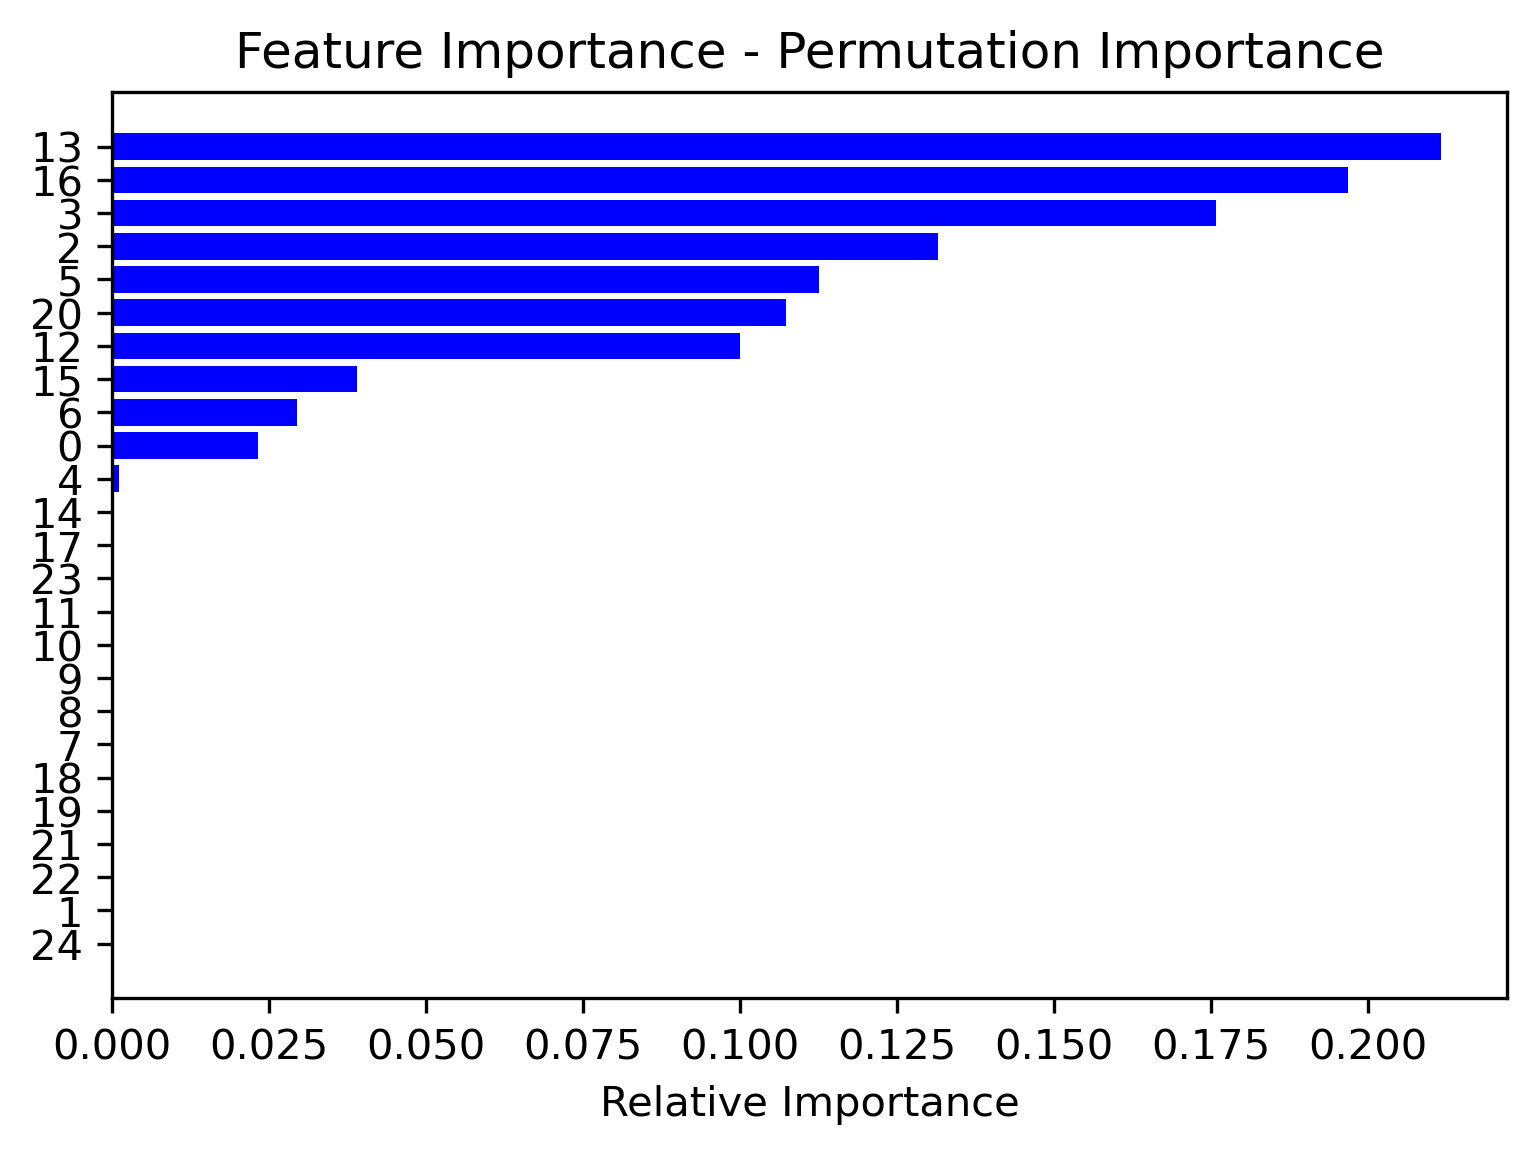

In [19]:
# Permutation Importance方法是一种近似的特征重要性度量，它对特征名称或具体数值并不敏感。
# 它只是通过随机排列来评估每个特征对模型的重要性。
# 因此，在该可视化中，特征对应的标签仅反映特征的索引，而不是实际的特征名称。

from sklearn.inspection import permutation_importance

result = permutation_importance(reg, X_train, y_train, n_repeats=10, random_state=42)
importance = result.importances_mean
indices = np.argsort(importance)

plt.figure(dpi=300)
plt.title("Feature Importance - Permutation Importance")
plt.barh(range(len(indices)), importance[indices], color='b', align='center')
plt.yticks(range(len(indices)), indices)
plt.xlabel('Relative Importance')
plt.savefig('有NLP的特征条形图.png')
plt.show()

In [20]:
importance = np.mean(np.abs(reg.coef_), axis=0)
indices = np.argsort(importance)

plt.figure()
plt.title("Feature Importance")
plt.barh(range(len(indices)), importance[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

AttributeError: 'SymbolicClassifier' object has no attribute 'coef_'

C:\Users\yiru\AppData\Local\Temp\ipykernel_8072\2700000278.py:13: UserWarning: Glyph 12289 (\N{IDEOGRAPHIC COMMA}) missing from current font.
  plt.savefig('有NLP的特征条形图1.png')
C:\Users\yiru\AppData\Local\Temp\ipykernel_8072\2700000278.py:13: UserWarning: Glyph 19977 (\N{CJK UNIFIED IDEOGRAPH-4E09}) missing from current font.
  plt.savefig('有NLP的特征条形图1.png')
C:\Users\yiru\AppData\Local\Temp\ipykernel_8072\2700000278.py:13: UserWarning: Glyph 20010 (\N{CJK UNIFIED IDEOGRAPH-4E2A}) missing from current font.
  plt.savefig('有NLP的特征条形图1.png')
C:\Users\yiru\AppData\Local\Temp\ipykernel_8072\2700000278.py:13: UserWarning: Glyph 28342 (\N{CJK UNIFIED IDEOGRAPH-6EB6}) missing from current font.
  plt.savefig('有NLP的特征条形图1.png')
C:\Users\yiru\AppData\Local\Temp\ipykernel_8072\2700000278.py:13: UserWarning: Glyph 21058 (\N{CJK UNIFIED IDEOGRAPH-5242}) missing from current font.
  plt.savefig('有NLP的特征条形图1.png')
C:\Users\yiru\AppData\Local\Temp\ipykernel_8072\2700000278.py:13: UserWarning: Glyph 3034

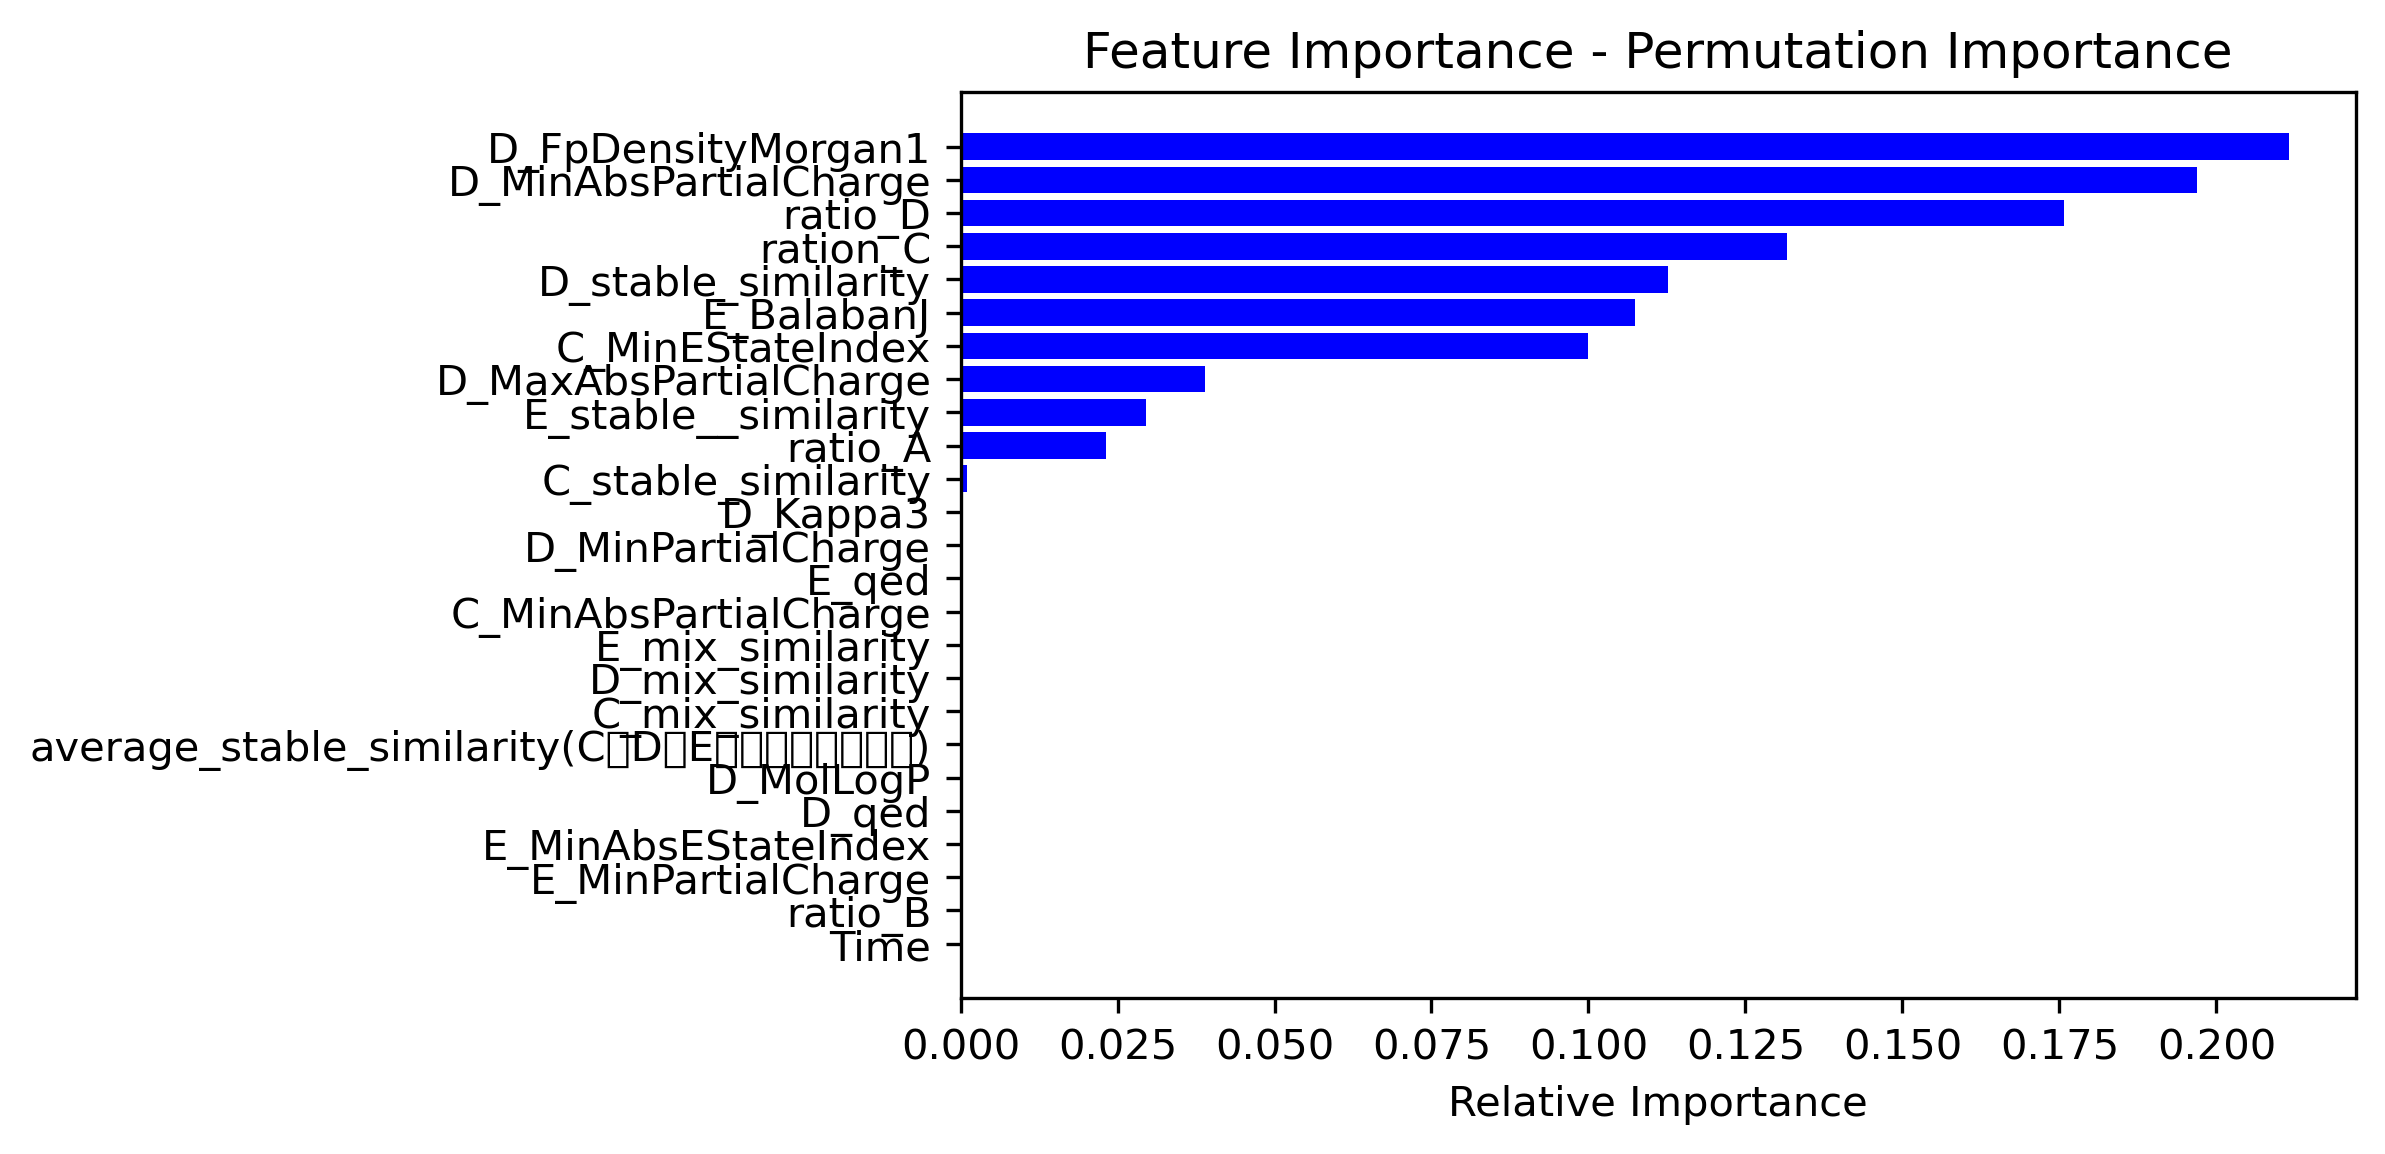

In [21]:
from sklearn.inspection import permutation_importance

result = permutation_importance(reg, X_train, y_train, n_repeats=10, random_state=42)
importance = result.importances_mean
indices = np.argsort(importance)
 # Convert feature names to a list

plt.figure(dpi=300)
plt.title("Feature Importance - Permutation Importance")
plt.barh(range(len(indices)), importance[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])  # Display feature names as a list
plt.xlabel('Relative Importance')
plt.savefig('有NLP的特征条形图1.png')
plt.show()

In [22]:
pickle.dump(reg,open("reg.dat","wb"))

Feature 24: Time
Feature 1: ratio_B
Feature 22: E_MinPartialCharge
Feature 21: E_MinAbsEStateIndex
Feature 19: D_qed
Feature 18: D_MolLogP
Feature 7: average_stable_similarity(C、D、E三个溶剂的平均值)
Feature 8: C_mix_similarity
Feature 9: D_mix_similarity
Feature 10: E_mix_similarity
Feature 11: C_MinAbsPartialCharge
Feature 23: E_qed
Feature 17: D_MinPartialCharge
Feature 14: D_Kappa3
Feature 4: C_stable_similarity
Feature 0: ratio_A
Feature 6: E_stable__similarity
Feature 15: D_MaxAbsPartialCharge
Feature 12: C_MinEStateIndex
Feature 20: E_BalabanJ
Feature 5: D_stable_similarity
Feature 2: ration_C
Feature 3: ratio_D
Feature 16: D_MinAbsPartialCharge
Feature 13: D_FpDensityMorgan1


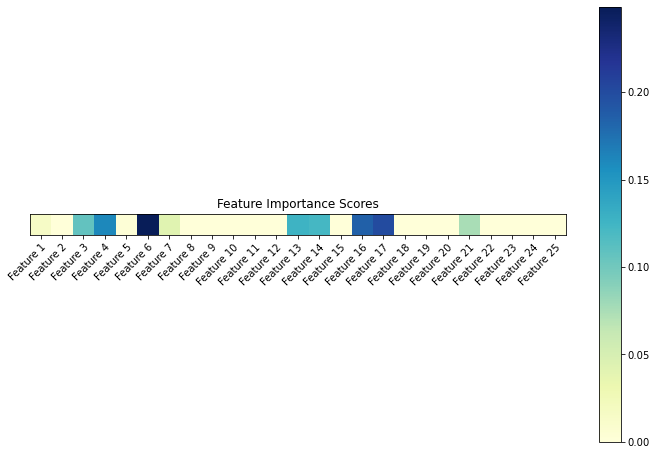

In [23]:

    
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np

# Get feature-importance scores
result = permutation_importance(reg, X_test, y_test, n_repeats=10, random_state=0)

# Create a heatmap
fig, ax = plt.subplots(figsize=(12,8))
im = ax.imshow(result.importances_mean.reshape(1, -1), cmap='YlGnBu')
# 打印每个特征索引对应的列名
for index in indices:
    print(f"Feature {index}: {feature_names[index]}")
    
    
# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set tick labels
ax.set_xticks(np.arange(len(result.importances_mean)))
ax.set_xticklabels([f"Feature {i+1}" for i in range(len(result.importances_mean))])
ax.set_yticks([])

# Rotate tick labels
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Set plot title and show plot
ax.set_title("Feature Importance Scores")
plt.savefig('有NLP的特征重要图.png')
plt.show()

In [24]:
pickle.dump(reg,open("reg.dat","wb"))